In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display options for DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
# Load COVID-19 data
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
covid_data = pd.read_csv(url)

# Display the first few rows
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/

In [6]:
# Transform the dataset to a long format for better analysis
covid_long = covid_data.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="Confirmed"
)

# Convert the 'Date' column to datetime
covid_long['Date'] = pd.to_datetime(covid_long['Date'])

# Aggregate by country and date
covid_country = covid_long.groupby(['Country/Region', 'Date']).sum().reset_index()

# Display the transformed data
covid_country.head()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_24712\471960846.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid_long['Date'] = pd.to_datetime(covid_long['Date'])


,Country/Region,Date,Province/State,Lat,Long,Confirmed
0,Afghanistan,2020-01-22,0,33.94,67.71,0
1,Afghanistan,2020-01-23,0,33.94,67.71,0
2,Afghanistan,2020-01-24,0,33.94,67.71,0
3,Afghanistan,2020-01-25,0,33.94,67.71,0
4,Afghanistan,2020-01-26,0,33.94,67.71,0


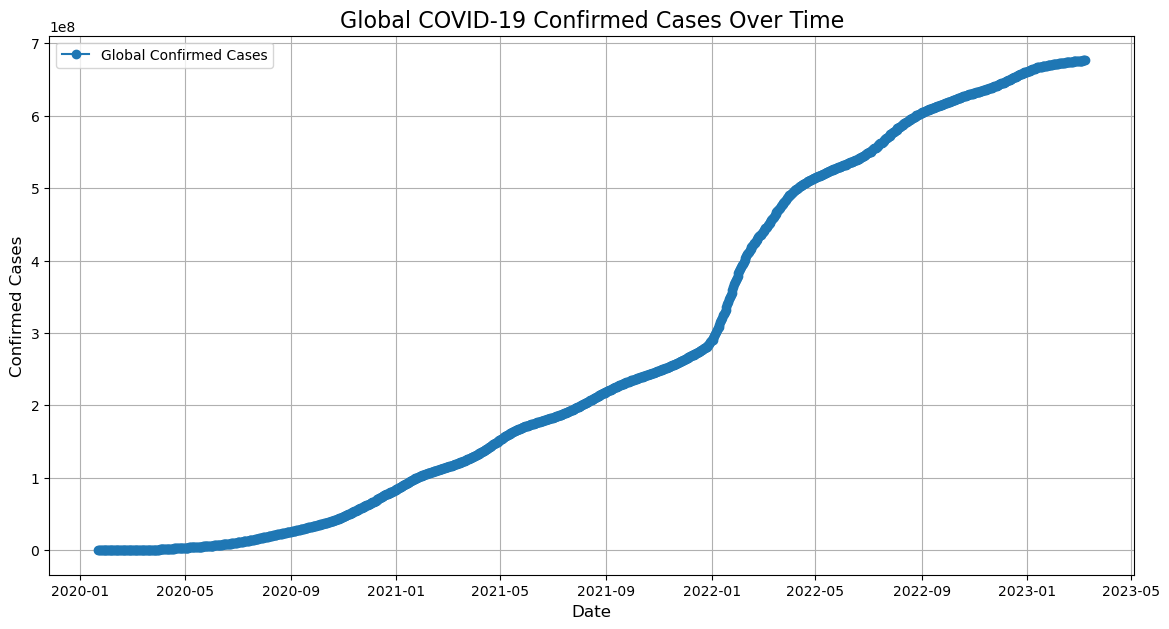

In [7]:
# Aggregate global confirmed cases
global_cases = covid_country.groupby('Date')['Confirmed'].sum().reset_index()

# Plot global trend
plt.figure(figsize=(14, 7))
plt.plot(global_cases['Date'], global_cases['Confirmed'], marker='o', label='Global Confirmed Cases')
plt.title("Global COVID-19 Confirmed Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.legend()
plt.grid()
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_24712\1499537074.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='coolwarm')


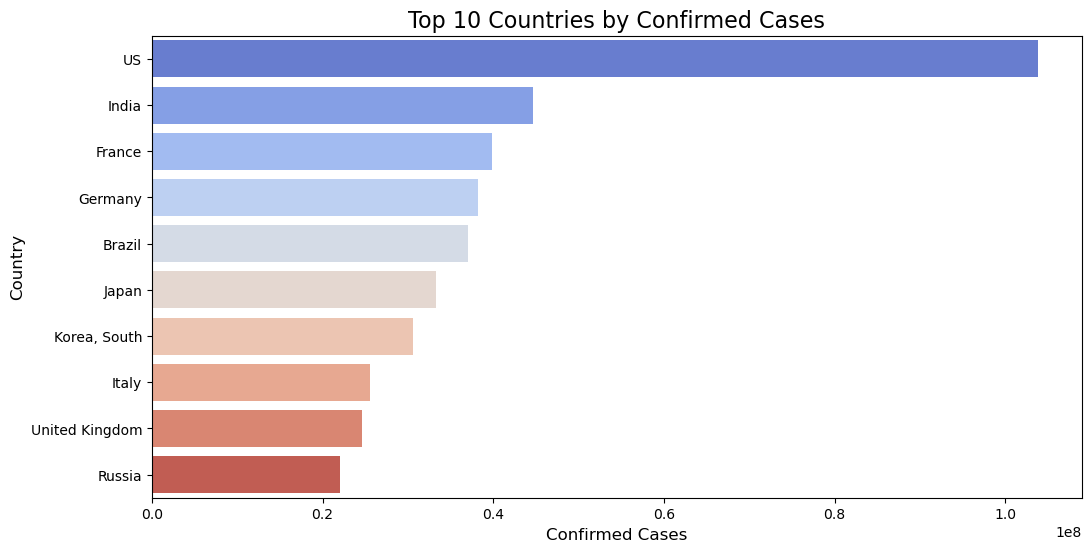

In [8]:
# Sum total cases by country
total_cases = covid_country.groupby('Country/Region')['Confirmed'].max().reset_index()

# Get the top 10 countries
top_countries = total_cases.sort_values('Confirmed', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='coolwarm')
plt.title("Top 10 Countries by Confirmed Cases", fontsize=16)
plt.xlabel("Confirmed Cases", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.show()

In [18]:
#Choropleth Map

pio.renderers.default = 'browser'

# Re-run the same Plotly code
fig = px.choropleth(
    latest_data,
    locations="Country/Region",
    locationmode="country names",
    color="Confirmed",
    hover_name="Country/Region",
    color_continuous_scale="Reds",
    title=f"Global Distribution of COVID-19 Cases as of {latest_date.date()}",
)
fig.show()

In [19]:
#Scatter Geo Map

fig = px.scatter_geo(
    latest_data,
    locations="Country/Region",
    locationmode="country names",
    size="Confirmed",
    color="Confirmed",
    hover_name="Country/Region",
    projection="natural earth",
    title=f"Global COVID-19 Cases as of {latest_date.date()}",
)
fig.show()

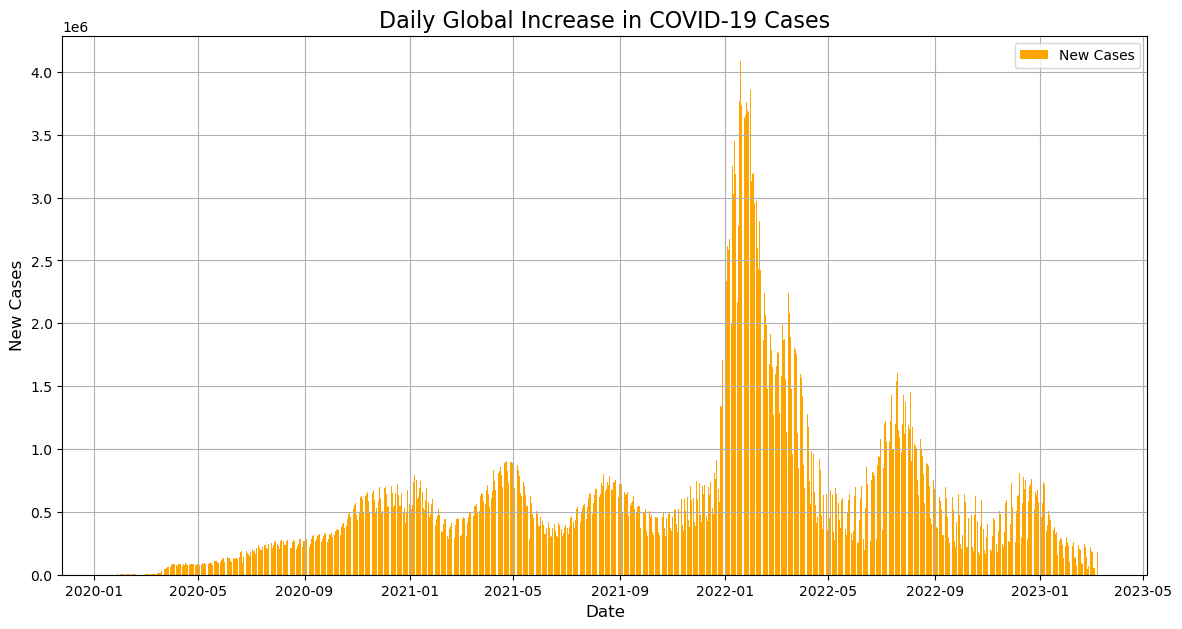

In [10]:
# Calculate daily new cases
covid_country['New Cases'] = covid_country.groupby('Country/Region')['Confirmed'].diff().fillna(0)

# Aggregate globally
global_daily = covid_country.groupby('Date')['New Cases'].sum().reset_index()

# Plot daily new cases
plt.figure(figsize=(14, 7))
plt.bar(global_daily['Date'], global_daily['New Cases'], color='orange', label='New Cases')
plt.title("Daily Global Increase in COVID-19 Cases", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("New Cases", fontsize=12)
plt.legend()
plt.grid()
plt.show()

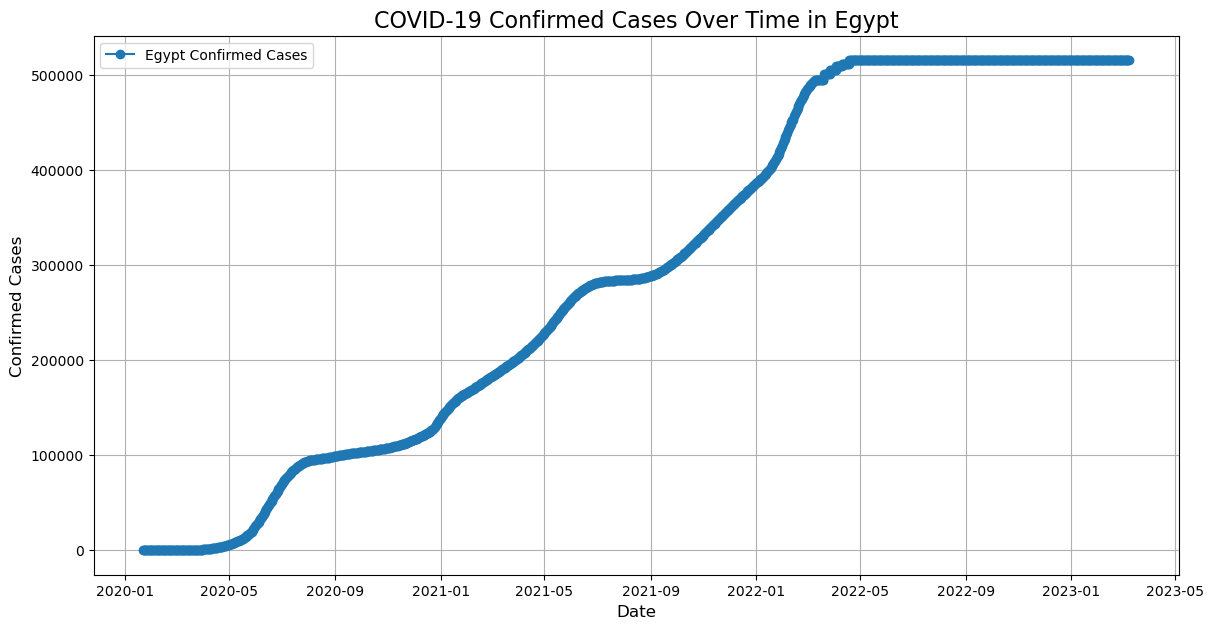

In [12]:
# Select a specific country (e.g., 'Egypt')
country = 'Egypt'
country_data = covid_country[covid_country['Country/Region'] == country]

# Plot confirmed cases trend for the selected country
plt.figure(figsize=(14, 7))
plt.plot(country_data['Date'], country_data['Confirmed'], marker='o', label=f'{country} Confirmed Cases')
plt.title(f"COVID-19 Confirmed Cases Over Time in {country}", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.legend()
plt.grid()
plt.show()